# Crypto

### A. Histogram dan Boxplot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0D60CCB0>]],
      dtype=object)

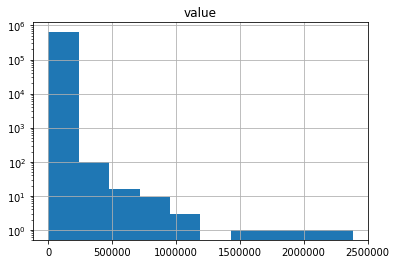

In [4]:
import pandas as pd
import numpy as np
import scipy
import scipy.stats as st

crypto = pd.read_csv('dataset_crypto.csv', names = ['value'])

crypto.hist(log = True)

Memasukkan data pada file "dataset_crypto.csv" kedalam variabel fifa, dan membuat histogram dari data tersebut.

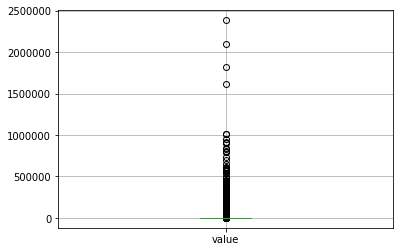

In [14]:
crypto.boxplot()

Membuat boxplot dari crypto

### B. Atribut Dasar

In [26]:
desc = crypto.describe().drop(['count','25%','50%','75%'])

desc.loc['median'] = crypto.median().at['value']
desc.loc['variance'] = crypto.var().at['value']
desc.loc['kurtosis'] = crypto.kurtosis().at['value']
desc.loc['skewness'] = crypto.skew().at['value']
desc.loc['mode'] = crypto.mode().at[0,'value']

desc

value
mean      2.030181e+02
std       8.678734e+03
min       2.925000e-09
max       2.383502e+06
median    9.733500e-03
variance  7.532042e+07
kurtosis  2.229747e+04
skewness  1.182396e+02
mode      2.000000e-06

Nilai kuartil, dan jumlah data tidak dibutuhkan, oleh karena itu atribut tersebut tidak ditampilkan (didrop).

Nilai median, variance, mode, kurtosis, dan skewness ditambahkan ke dalam tabel desc.

### C. Penentuan Distribusi Peluang

Penentuan fungsi distribusi peluang dilakukan dengan cara mencocokan berbagai kemungkinan distribusi peluang, salah satunya dengan mencocokkan bentuk histogram, setelah melakukan berbagai pencocokkan, didapatkan sebuah distribusi peluang yang cocok, yaitu:

##### Gamma, dengan alpha = 1.03e-05, dan beta = 2.98

  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0D46E3B0>]],
      dtype=object)

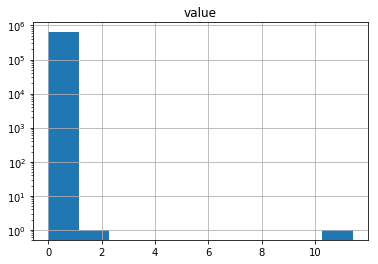

In [28]:
randomgamma = pd.DataFrame(np.random.gamma(1.0350357867723378e-05, 2.9817719729930694, size = crypto.value.count()), columns = ['value'])
randomgamma.hist(log= True)

###### Gambar histogram distribusi gamma dari data yang dibuat secara acak dengan jumlah data sebanyak data crypto, dengan parameter yang telah disebutkan sebelumnya, memiliki kemiripan dengan histogram crypto

### D. Jawaban Soal Terkait

#### Soal 1

- Apabila hari ini terdapat 1000 data harga cryptocurrency baru, tentukan ekspektasi jumlah cryptocurrency yang nilainya:
    * kurang dari 0.177013
    * lebih dari 177.013

In [6]:
a = 1.0350357867723378e-05
scale = 2.9817719729930694

st.gamma.cdf(0.177013, a, 0, scale) * 1000 ##Kurang dari 0.177013

999.9761392156848

Jawaban dari poin pertama adalah:

##### 999.9761392156848

In [7]:
( 1 - st.gamma.cdf(177.013, a, 0, scale) ) * 1000 ##lebih dari 177.013

0.0

Jawaban dari poin ke-dua adalah

##### 0.0

Angka 0.0 muncul karena peluang sangatlah kecil

#### Soal 2

- Jika suatu hari terdapat sebuah cryptocurrency baru, tentukan peluang cryptocurrency tersebut bernilai:
    * lebih dari 0.013
    * kurang dari 17.7

In [8]:
1 - st.gamma.cdf(0.013, a, 0, scale)

5.032705417618022e-05

Jawaban dari poin pertama adalah:

##### 5.032705417618022e-05

In [9]:
st.gamma.cdf(17.7, a, 0, scale)

0.9999999959890807

Jawaban dari poin ke-dua adalah:

##### 0.9999999959890807